In [499]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [500]:
import pandas as pd
# Startups data in USA
data = pd.read_csv('50_Startups.csv', delimiter = ';')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [501]:
def R2_adj(R2, n, k):
    R2_adj = 1 - (1 - R2) * ((n - 1)/(n - (k + 1)))
    return R2_adj

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          49 non-null float64
Administration     49 non-null float64
Marketing Spend    49 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [503]:
null_data = data.isnull().any(axis=1)
#null_data
null_data = data[null_data]
null_data

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,NaN,New York,122776.86
22,73994.56,NaN,303319.26,Florida,110352.25
33,NaN,103057.49,214634.81,Florida,96778.92


In [504]:
#null_data.loc[[19,22], :]

# Replacing Null Values
to begin Visualization by droping the null values or by replacing them by the mean or the median 
the choice taken here is to replace the null values by the mean of the rows corresponding to the state column
choosing median instead of mean because of the presence od some outliers

In [505]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,49.000000,49.000000,49.000000,50.000000
mean,74093.608776,121315.290408,215331.732449,112012.639200
std,46301.730529,28307.373863,119665.391550,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,103057.490000,134050.070000,90138.902500
50%,73994.560000,122616.840000,214634.810000,107978.190000
75%,101913.080000,145077.580000,299737.290000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [506]:
data_median = data.median()
data_median

R&D Spend           73994.56
Administration     122616.84
Marketing Spend    214634.81
Profit             107978.19
dtype: float64

we have to get 2 medians one for new york and one for florida 
first get the median for new york

In [507]:
data_newyork = data[data['State'] == 'New York']
data_florida = data[data['State'] == 'Florida']

In [508]:
data_med_newyork = data_newyork.median()
data_med_florida = data_florida.median()
data_med_florida

R&D Spend           75328.87
Administration     115641.28
Marketing Spend    253176.18
Profit             109543.12
dtype: float64

In [509]:
data['R&D Spend'][33] = data_med_florida['R&D Spend']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [510]:
data['Administration'][22] = data_med_florida['Administration']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [511]:
data['Marketing Spend'][19] = data_med_newyork['Marketing Spend']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now we don't have any null values, they were filled by the median 

# Visualizing the Data

In [512]:
data_num = data.loc[:, data.columns != 'State']

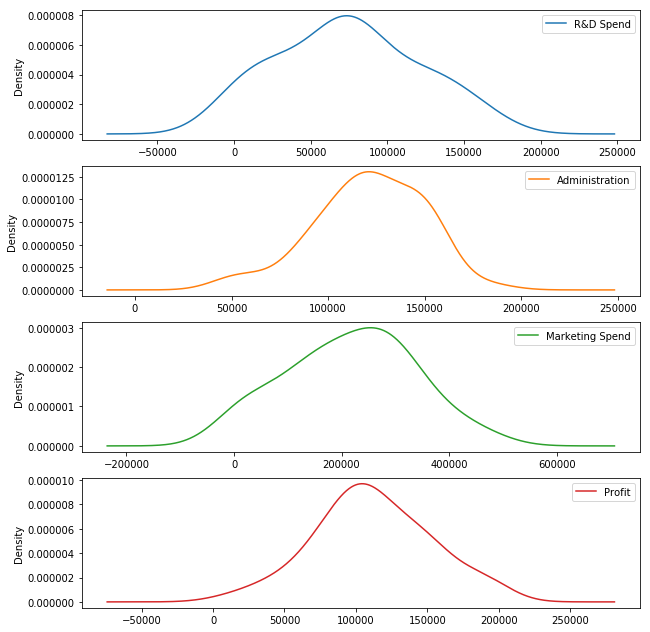

In [513]:
data_num.plot.density(subplots=True, sharex=False, figsize = (10,11), ) 
plt.savefig('Density_plot')

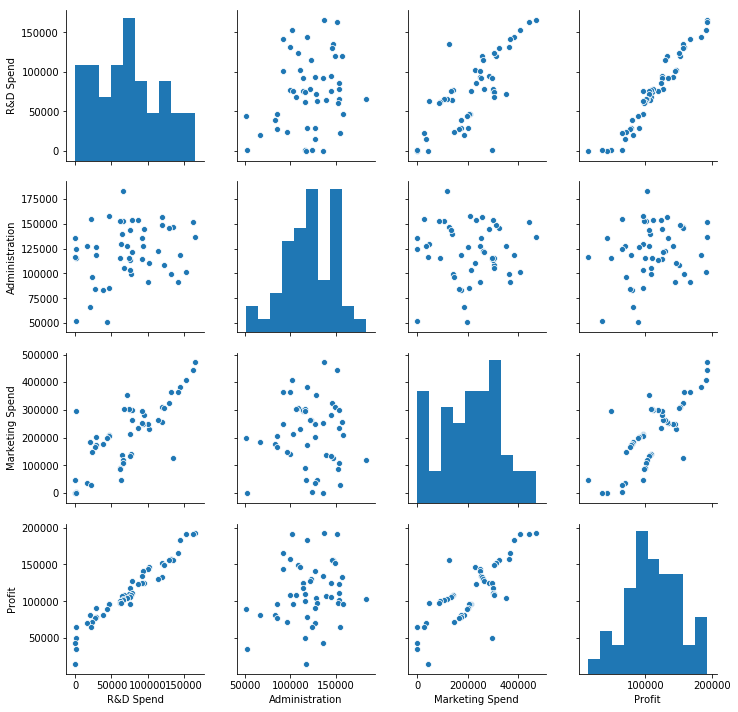

In [514]:
sns.pairplot(data)
plt.savefig('pairplot')

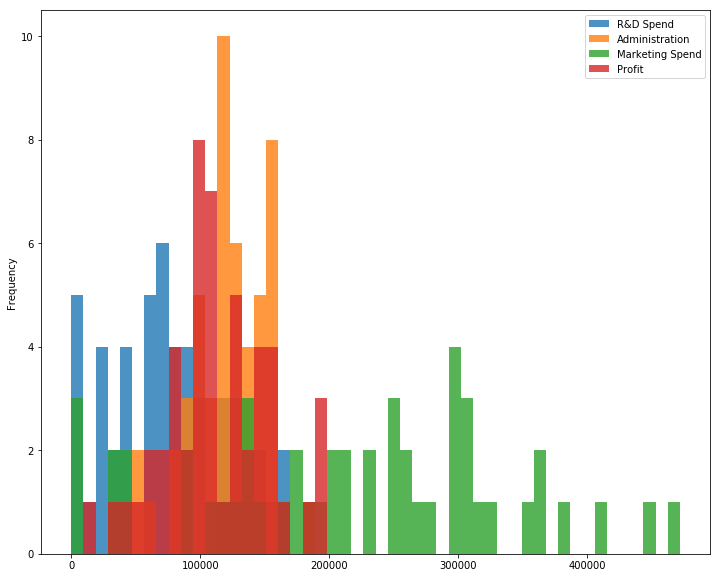

In [515]:
data.plot.hist(bins=50,alpha=0.8, figsize = (12, 10)) 
plt.savefig('histplot')

from this plot we can see that the data are not scaled on the same scale

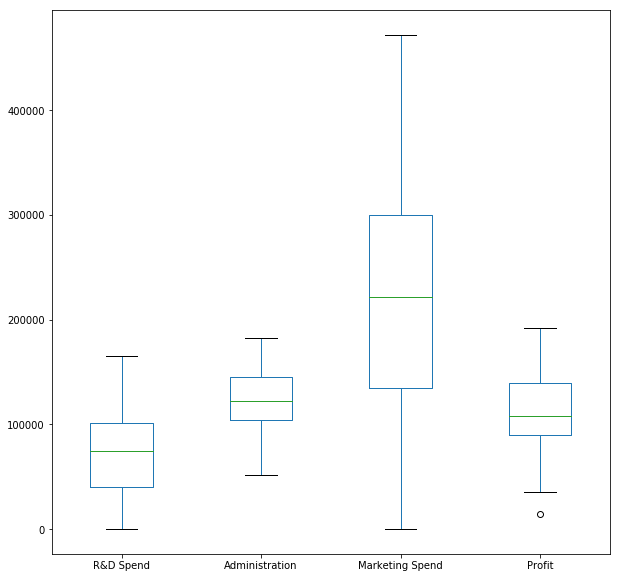

In [516]:
data.plot.box(figsize = (10,10))
plt.savefig('boxplot')

from this plot we can see that there are outliers under the minimum of profit distribution

# Removing Outliers

In [517]:
describo = data.describe()
describo

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.0000,50.000000,50.000000
mean,74118.314000,121201.8102,215698.036500,112012.639200
std,45827.161394,28028.5228,118466.340917,40306.180338
min,0.000000,51283.1400,0.000000,14681.400000
25%,39936.370000,103730.8750,135028.207500,90138.902500
50%,74661.715000,122107.1950,221897.880000,107978.190000
75%,101602.800000,144842.1800,299469.085000,139765.977500
max,165349.200000,182645.5600,471784.100000,192261.830000


min = Q1 - 1.5 * IQR

In [518]:
q1_profit = describo['Profit'][4]
q3_profit = describo['Profit'][6]
iqr_profit = q3_profit - q1_profit

In [519]:
min_profit = q1_profit - 1.5 * iqr_profit
min_profit

15698.290000000023

In [520]:
data[data['Profit'] <= min_profit]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


A hard call whether to drop this outlier or not, because the R&D column is zero
so this maybe the reason why the profit is too low.
I think this is useful for the model, so I will not drop it. 

# Preparing the Data for The Predictive Model

Correlation 

In [521]:
# See Correlation with profit
data.corr()['Profit']

R&D Spend          0.971156
Administration     0.200854
Marketing Spend    0.782652
Profit             1.000000
Name: Profit, dtype: float64

The three columns have correlation with profit so we'll go with all of them

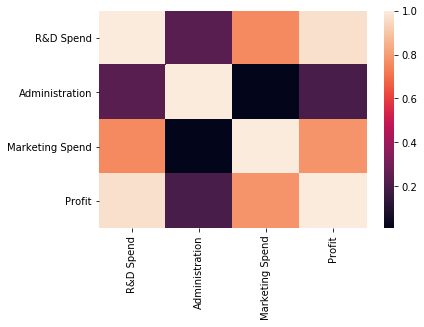

In [522]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [523]:
corr.style.background_gradient(cmap='coolwarm')

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1,0.23651,0.759925,0.971156
Administration,0.23651,1,0.00917185,0.200854
Marketing Spend,0.759925,0.00917185,1,0.782652
Profit,0.971156,0.200854,0.782652,1


Convert categorical Variables

In [524]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE = LabelEncoder()
data['State'] = LE.fit_transform(data['State'])

In [525]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Adding a rondom number generated columns

In [526]:
data['Random1'] = np.random.randint(200000, 400000, data.shape[0])
data['Random2'] = np.random.randint(50000, 150000, data.shape[0])

In [527]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Random1,Random2
0,165349.20,136897.80,471784.10,2,192261.83,329077,78629
1,162597.70,151377.59,443898.53,0,191792.06,362854,60047
2,153441.51,101145.55,407934.54,1,191050.39,290832,102657
3,144372.41,118671.85,383199.62,2,182901.99,317079,80331
4,142107.34,91391.77,366168.42,1,166187.94,247000,149213


In [528]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Random1', 'Random2']]
y = data['Profit']

In [529]:
X.head()

,R&D Spend,Administration,Marketing Spend,State,Random1,Random2
0,165349.20,136897.80,471784.10,2,329077,78629
1,162597.70,151377.59,443898.53,0,362854,60047
2,153441.51,101145.55,407934.54,1,290832,102657
3,144372.41,118671.85,383199.62,2,317079,80331
4,142107.34,91391.77,366168.42,1,247000,149213


In [530]:
OHE = OneHotEncoder(categorical_features = [3])
X = OHE.fit_transform(X.values).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [531]:
X.shape, y.shape

((50, 8), (50,))

In [532]:
y = y.values
y = y.reshape(-1, 1)
y.shape

(50, 1)

In [533]:
#X

# Regression Model

Regression model without feature scaling

In [534]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [535]:
y_hat = regressor.predict(X)

In [536]:
from sklearn.metrics import mean_squared_error as mse
mse_no_scale = mse(y, y_hat)
mse_no_scale

79877109.53293248

In [537]:
y_hato = regressor.predict([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.65349200e+05,
        1.36897800e+05, 4.71784100e+05, 227816, 95775]])

In [538]:
y_hato

array([[191077.5170459]])

In [539]:
y[0]

array([192261.83])

In [540]:
import sklearn.metrics as mc

In [541]:
n = X.shape[0]
n

50

In [542]:
k = X.shape[1]
k

8

In [543]:
R_2_no_scale = mc.r2_score(y, y_hat)
print(R_2_no_scale)
R_2_no_scale_adj = R2_adj(R_2_no_scale, n, k)
print(R_2_no_scale_adj)

0.949828974530636
0.9400395061463698


In [544]:
XO = pd.DataFrame(X)

In [545]:
XO.columns = ['California', 'Florida', 'New York', 'R&D Spend', 'Administration', 'Marketing Spend', 'Random1', 'Random2']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000122C6A90>,
      dtype=object)

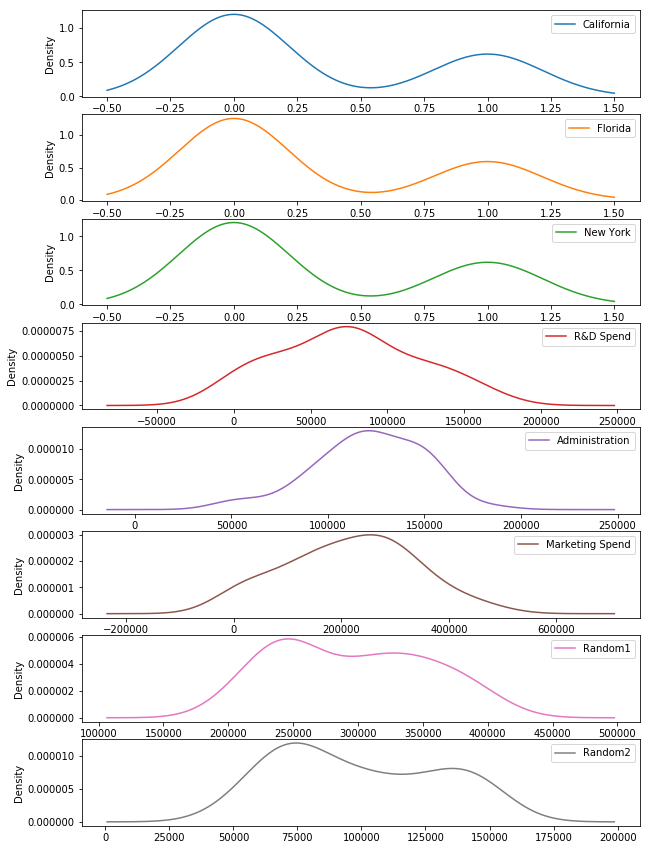

In [546]:
XO.plot.density(subplots=True, sharex=False, figsize = (10,15), ) 
#plt.savefig('Density_plot')

# Regression with Feature Scaling

Regression model with Feature Scaling with Z-Score

In [547]:
X = pd.DataFrame(X)

In [548]:
X.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,329077.0,78629.0
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,362854.0,60047.0
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,290832.0,102657.0
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,317079.0,80331.0
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,247000.0,149213.0


In [549]:
X_scale = X[[3,4,5,6,7]]

In [550]:
X_no_scale = X[[0,1,2]]

In [551]:
from sklearn.preprocessing import StandardScaler #z-score
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X_scale)
y = sc_Y.fit_transform(y)

In [552]:
X = pd.DataFrame(X)

In [553]:
X.head()

,0,1,2,3,4
0,2.010971,0.565686,2.183624,0.596982,-0.656462
1,1.950321,1.087540,1.945846,1.187255,-1.262610
2,1.748494,-0.722831,1.639185,-0.071373,0.127335
3,1.548587,-0.091180,1.428272,0.387309,-0.600943
4,1.498659,-1.074359,1.283048,-0.837363,1.645998


In [554]:
X = pd.concat([X_no_scale, X], axis=1)

In [555]:
X.head()

,0,1,2,0,1,2,3,4
0,0.0,0.0,1.0,2.010971,0.565686,2.183624,0.596982,-0.656462
1,1.0,0.0,0.0,1.950321,1.087540,1.945846,1.187255,-1.262610
2,0.0,1.0,0.0,1.748494,-0.722831,1.639185,-0.071373,0.127335
3,0.0,0.0,1.0,1.548587,-0.091180,1.428272,0.387309,-0.600943
4,0.0,1.0,0.0,1.498659,-1.074359,1.283048,-0.837363,1.645998


In [556]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [557]:
y_hat = regressor.predict(X)

In [558]:
from sklearn.metrics import mean_squared_error as mse
mse_scale = mse(y, y_hat)
mse_scale

0.05017102546936404

In [559]:
n = X.shape[0]
n

50

In [560]:
k = X.shape[1]
k

8

In [561]:
R_2_scale = mc.r2_score(y, y_hat)
print(R_2_scale)
R_2_scale_adj = R2_adj(R_2_scale, n, k)
print(R_2_scale_adj)

0.949828974530636
0.9400395061463698


In [562]:
XO = pd.DataFrame(X)

In [563]:
XO.columns = ['California', 'Florida', 'New York', 'R&D Spend', 'Administration', 'Marketing Spend', 'Random1', 'Random2']

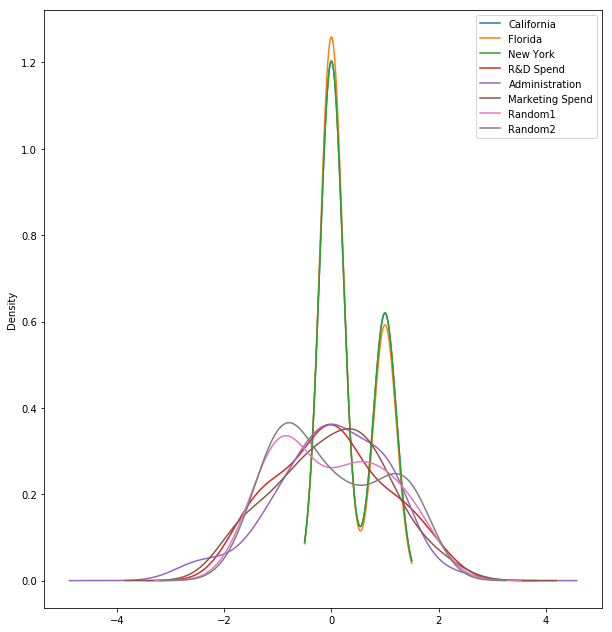

In [564]:
XO.plot.density(subplots=False, sharex=True, figsize = (10,11)) 
plt.savefig('Density_plot_scale')

# Regression with Feature Scaling

Regression with feature scaling using minmax scaler

In [565]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Random1', 'Random2']]
y = data['Profit']

In [566]:
OHE = OneHotEncoder(categorical_features = [3])
X = OHE.fit_transform(X.values).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [567]:
y = y.values
y = y.reshape(-1, 1)

In [568]:
X = pd.DataFrame(X)

In [569]:
X.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,329077.0,78629.0
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,362854.0,60047.0
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,290832.0,102657.0
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,317079.0,80331.0
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,247000.0,149213.0


In [570]:
X_scale = X[[3,4,5,6,7]]
X_no_scale = X[[0,1,2]]

In [571]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_Y = MinMaxScaler()
X = sc_X.fit_transform(X_scale)
y = sc_Y.fit_transform(y)

In [572]:
X = pd.DataFrame(X)

In [573]:
X.head()

,0,1,2,3,4
0,1.000000,0.651744,1.000000,0.638009,0.287182
1,0.983359,0.761972,0.940893,0.810709,0.099524
2,0.927985,0.379579,0.864664,0.442464,0.529837
3,0.873136,0.512998,0.812235,0.576663,0.304370
4,0.859438,0.305328,0.776136,0.218353,1.000000


In [574]:
X = pd.concat([X_no_scale, X], axis=1)

In [575]:
X.head()

,0,1,2,0,1,2,3,4
0,0.0,0.0,1.0,1.000000,0.651744,1.000000,0.638009,0.287182
1,1.0,0.0,0.0,0.983359,0.761972,0.940893,0.810709,0.099524
2,0.0,1.0,0.0,0.927985,0.379579,0.864664,0.442464,0.529837
3,0.0,0.0,1.0,0.873136,0.512998,0.812235,0.576663,0.304370
4,0.0,1.0,0.0,0.859438,0.305328,0.776136,0.218353,1.000000


In [576]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [577]:
y_hat = regressor.predict(X)

In [578]:
from sklearn.metrics import mean_squared_error as mse
mse_scale_minmax = mse(y, y_hat)
mse_scale_minmax

0.002532982179519331

In [579]:
n = X.shape[0]
n

50

In [580]:
k = X.shape[1]
k

8

In [581]:
R_2_scale_minmax = mc.r2_score(y, y_hat)
print(R_2_scale_minmax)
R_2_scale_minmax_adj = R2_adj(R_2_scale_minmax, n, k)
print(R_2_scale_minmax_adj)

0.949828974530636
0.9400395061463698


In [582]:
XO = pd.DataFrame(X)

In [583]:
XO.columns = ['California', 'Florida', 'New York', 'R&D Spend', 'Administration', 'Marketing Spend', 'Random1', 'Random2']

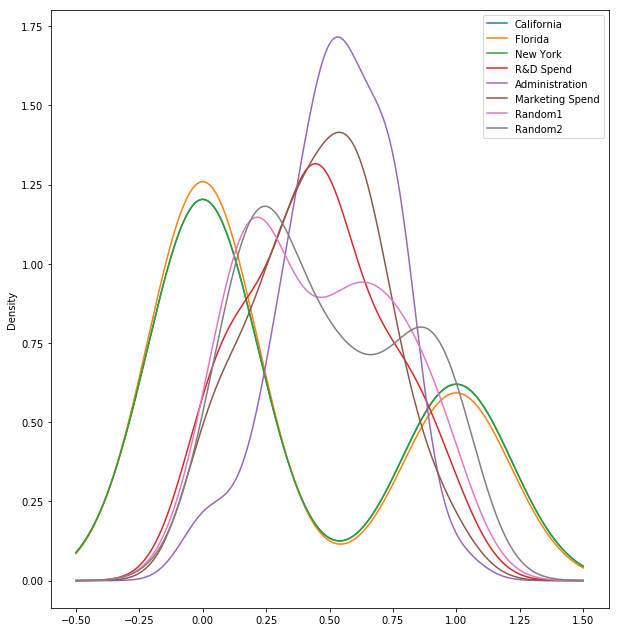

In [584]:
XO.plot.density(subplots=False, sharex=True, figsize = (10,11)) 
plt.savefig('Density_plot_scale_minmax')

# Representing Results

In [585]:
Result = pd.DataFrame([[mse_no_scale, mse_scale, mse_scale_minmax], [R_2_no_scale, R_2_scale, R_2_scale_minmax],
                       [R_2_no_scale_adj, R_2_scale_adj, R_2_scale_minmax_adj]])

In [586]:
Result

,0,1,2
0,7.987711e+07,0.050171,0.002533
1,9.498290e-01,0.949829,0.949829
2,9.400395e-01,0.940040,0.940040


In [587]:
Result.columns = ['No Scaling', 'Standard Scaler', 'MinMax Scaler']

In [588]:
Result.index = ['Mean Squared Error', 'R Squared', 'R Squared Adjusted']

In [589]:
Result

,No Scaling,Standard Scaler,MinMax Scaler
Mean Squared Error,7.987711e+07,0.050171,0.002533
R Squared,9.498290e-01,0.949829,0.949829
R Squared Adjusted,9.400395e-01,0.940040,0.940040


# Dimensionality Reduction by P-Value

In [590]:
import statsmodels.formula.api as sm

In [591]:
sl = 0.05

In [592]:
X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values = X, axis = 1)

In [593]:
X.shape

(50, 9)

In [594]:
X_opt = X[:, [0,1,2,3,4,5,6,7,8]]

In [595]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [596]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           3.36e-25
Time:                        22:55:02   Log-Likelihood:                 78.512
No. Observations:                  50   AIC:                            -141.0
Df Residuals:                      42   BIC:                            -125.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1218      0.024      5.173      0.000       0.074       0.169
x1             0.0415      0.014      3.056      0.004       0.014       0.069
x2             0.0377      0.014      2.608      0.013       0.009       0.067
x3             0.0426      0.013      3.257      0.002       0.016       0.069
x4             0.7389      0.047     15.581      0.000       0.643       0.835
x5            -0.0130      0.039     -0.331      0.742      -0.093       0.067
x6             0.0862      0.052      1.655      0.105      -0.019       0.191
x7             0.0264      0.028      0.955      0.345      -0.029       0.082
x8             0.0200      0.025      0.788      0.435      -0.031       0.071
==============================================================================
Omnibus:                       12.174   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.728
Skew:                          -0.867   Prob(JB):                     0.000634
Kurtosis:                       5.015   Cond. No.                     1.38e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.68e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [597]:
p_values = regressor_OLS.pvalues
p_values

array([6.05751167e-06, 3.89362192e-03, 1.25545729e-02, 2.23154140e-03,
       4.62494104e-19, 7.42494249e-01, 1.05359102e-01, 3.44863439e-01,
       4.34943698e-01])

In [598]:
index = np.argmax(p_values)
index

5

In [599]:
R2_adj = regressor_OLS.rsquared_adj
R2_adj

0.9414671369524086

In [600]:
k

8

In [601]:
R2_adj = np.array([])

In [602]:
R2_adj

array([], dtype=float64)

In [603]:
R2_adj = np.append(R2_adj, 0)
R2_adj


array([0.])

In [604]:
for i in range(k):
    regressor_OLS = sm.OLS(endog = y, exog = X).fit()
    p_values = regressor_OLS.pvalues
    index = np.argmax(p_values)
    R2_adj = np.append(R2_adj, regressor_OLS.rsquared_adj)
    X = pd.DataFrame(X)
    X = X.drop([index], axis = 1)
    X.columns = range(X.shape[1])
    X = X.values
    if(R2_adj[-1] < R2_adj[-2]):
        break
    
    

In [608]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,1.0,0.0,1.0,1.000000
1,1.0,1.0,0.0,0.983359
2,1.0,0.0,0.0,0.927985
3,1.0,0.0,1.0,0.873136
4,1.0,0.0,0.0,0.859438


In [491]:
X = X.drop([1], axis = 1)

In [492]:
X.head()

,0,2,3,4
0,1.0,0.0,1.0,1.000000
1,1.0,0.0,0.0,0.983359
2,1.0,1.0,0.0,0.927985
3,1.0,0.0,1.0,0.873136
4,1.0,1.0,0.0,0.859438


In [493]:
X.head()

,0,2,3,4
0,1.0,0.0,1.0,1.000000
1,1.0,0.0,0.0,0.983359
2,1.0,1.0,0.0,0.927985
3,1.0,0.0,1.0,0.873136
4,1.0,1.0,0.0,0.859438


In [494]:
X.shape[1]

4

In [495]:
X.columns = range(X.shape[1])

In [497]:
X.head()

,0,1,2,3
0,1.0,0.0,1.0,1.000000
1,1.0,0.0,0.0,0.983359
2,1.0,1.0,0.0,0.927985
3,1.0,0.0,1.0,0.873136
4,1.0,1.0,0.0,0.859438


In [498]:
R2_adj

array([0.        , 0.94466778, 0.94466778, 0.94466778, 0.94466778,
       0.94466778])